In [1]:
import networkx as nx
import random
import pandas as pd
import numpy as np
import os
import csv
from matplotlib import pyplot as plt

In [4]:
l=[]
with open('Slashdot0902.txt') as f:
    for line in f:
        il=line.split("\t")
        il[-1]=il[-1][:-1]
        il=list(map(int,il))
        l.append(il)

print(l[:10])

refined_l = []
for i in l:
    if i[0] < 100 and i[1] < 100:
        refined_l.append(i)

print(refined_l[:10])

[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9]]
[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9]]


In [5]:
nodes = []
for i in refined_l:
    nodes.append(i[0])
    nodes.append(i[1])

nodes = sorted(set(nodes))

In [6]:
Gr = nx.Graph()
for i in nodes:
    Gr.add_node(i)

In [7]:
tuple_t = []
for i in refined_l:
    tuple_t.append((i[0],i[1]))

Gr.add_edges_from(tuple_t)

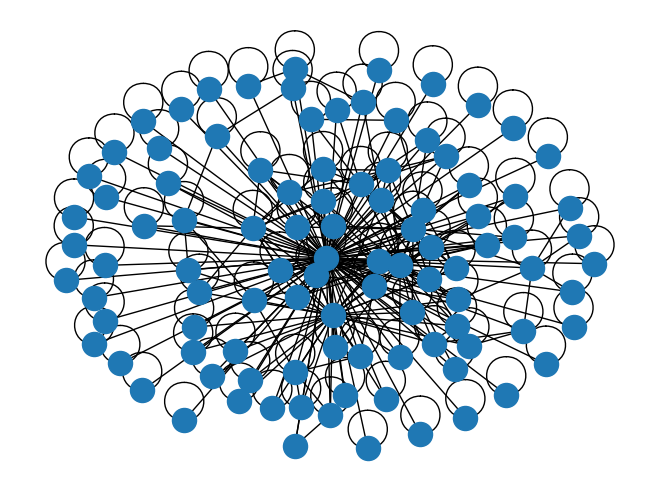

In [8]:
nx.draw(Gr)
plt.draw()

In [9]:
d_cent=nx.degree_centrality(Gr)
node=max(d_cent,key=d_cent.get)
print("Degree Centrality:")
print("Average = "+str(sum(d_cent.values())/len(d_cent)))

Degree Centrality:
Average = 0.06929292929292927


In [10]:
eigenvalues = np.linalg.eigvals(nx.adjacency_matrix(Gr, weight = "weight").A)
max_eigenvalue = abs(max(eigenvalues))
alpha = random.random() * (1/max_eigenvalue)
print("Maximum Eigenvalue = " + str(max_eigenvalue))
print("Alpha = " + str(alpha))

C:\Users\91948\AppData\Local\Temp\ipykernel_24220\1152552821.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  eigenvalues = np.linalg.eigvals(nx.adjacency_matrix(Gr, weight = "weight").A)


Maximum Eigenvalue = 14.326308481765098
Alpha = 0.010293850701946992


In [11]:
k_cent = nx.katz_centrality(Gr, alpha, weight = "weight")
print("Katz Centrality:")
print("Average = " + str(sum(k_cent.values()) / len(k_cent)))
node=max(k_cent, key=k_cent.get)

Katz Centrality:
Average = 0.09939409558875006


In [12]:
pagerank = nx.pagerank(Gr, alpha = alpha, weight = "weight")
print("PageRank:")
print("Average = " + str(sum(pagerank.values()) / len(pagerank)))
node=max(pagerank, key=pagerank.get)

PageRank:
Average = 0.009999999999999997


In [13]:
bet_cent = nx.betweenness_centrality(Gr, weight="weight") # Increase k for more accuracy
print("Betweenness Centrality:")
print("Average = " + str(sum(bet_cent.values()) / len(bet_cent)))
node=max(bet_cent, key=bet_cent.get)

Betweenness Centrality:
Average = 0.00970109255823541


In [14]:
c_cent = nx.closeness_centrality(Gr, distance = "weight")
print("Closeness Centrality:")
print("Average = " + str(sum(c_cent.values()) / len(c_cent)))
node=max(c_cent, key=c_cent.get)

Closeness Centrality:
Average = 0.5154224329043252


In [15]:
print("Transitivity:")
print(nx.transitivity(Gr))

Transitivity:
0.10435558198305336


In [16]:
print("Reciprocity:")
print(nx.reciprocity(Gr))

Reciprocity:
0.0


In [17]:
print("Clustering Coefficient:")
print(nx.clustering(Gr, weight = "weight"))

Clustering Coefficient:
{0: 0.029890744176458463, 1: 0.2857142857142857, 2: 0.6666666666666666, 3: 0.6111111111111112, 4: 0.5, 5: 0.5, 6: 0, 7: 0, 8: 0.2, 9: 0.28654970760233917, 10: 1.0, 11: 0.6071428571428571, 12: 0, 13: 0, 14: 0.8, 15: 0.6666666666666666, 16: 0, 17: 0.11522048364153627, 18: 1.0, 19: 0.6666666666666666, 20: 0, 21: 0.6, 22: 0.5, 23: 0, 24: 0, 25: 1.0, 26: 1.0, 27: 1.0, 28: 0.8571428571428571, 29: 1.0, 30: 1.0, 31: 0, 32: 0, 33: 0, 34: 1.0, 35: 0.6666666666666666, 36: 0.6666666666666666, 37: 0.24358974358974358, 38: 0.8, 39: 1.0, 40: 0, 41: 1.0, 42: 0, 43: 1.0, 44: 0, 45: 1.0, 46: 0, 47: 0, 48: 0, 49: 0.3142857142857143, 50: 0.9333333333333333, 51: 0.6666666666666666, 52: 0.7333333333333333, 53: 1.0, 54: 0.8333333333333334, 55: 1.0, 56: 0, 57: 0, 58: 0.6666666666666666, 59: 0, 60: 0.5333333333333333, 61: 0.6666666666666666, 62: 0.6666666666666666, 63: 1.0, 64: 1.0, 65: 0, 66: 0.8333333333333334, 67: 0, 68: 0.6666666666666666, 69: 0.6, 70: 0, 71: 1.0, 72: 0, 73: 1.0, 74

In [18]:
import random
import pandas as pd
import numpy as np
import os
import csv
from matplotlib import pyplot as plt

In [19]:
l=[]
with open('twitter_combined.txt') as f:
    for line in f:
        il=line.split(" ")
        il[-1]=il[-1][:-1]
        il=list(map(int,il))
        l.append(il)

print(l[:10])

refined_l = []
for i in l:
    if i[0] < 1000 and i[1] < 1000:
        refined_l.append(i)

print(refined_l[:10])

[[214328887, 34428380], [17116707, 28465635], [380580781, 18996905], [221036078, 153460275], [107830991, 17868918], [151338729, 222261763], [19705747, 34428380], [222261763, 88323281], [19933035, 149538028], [158419434, 17434613]]
[[47, 380], [47, 14], [380, 14], [47, 528], [14, 586], [14, 380], [761, 528], [586, 380], [761, 47], [761, 380]]


In [20]:
nodes = []
for i in refined_l:
    nodes.append(i[0])
    nodes.append(i[1])

nodes = sorted(set(nodes))

In [21]:
Gr = nx.Graph()
for i in nodes:
    Gr.add_node(i)

In [22]:
tuple_t = []
for i in refined_l:
    tuple_t.append((i[0],i[1]))

Gr.add_edges_from(tuple_t)

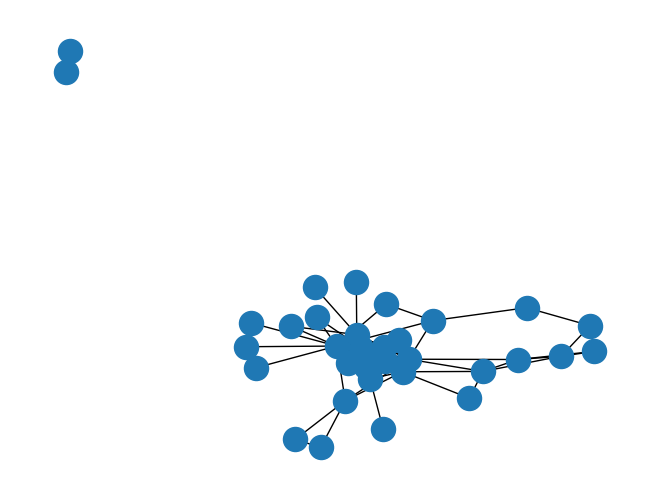

In [23]:
nx.draw(Gr)
plt.draw()

In [24]:
d_cent=nx.degree_centrality(Gr)
node=max(d_cent,key=d_cent.get)
print("Degree Centrality:")
print("Average = "+str(sum(d_cent.values())/len(d_cent)))

Degree Centrality:
Average = 0.160427807486631


In [25]:
e_cent = nx.eigenvector_centrality(Gr, weight='weight')
print("Eigenvector Centrality:")
print("Average = " + str(sum(e_cent.values()) / len(e_cent)))
node=max(e_cent, key=e_cent.get)

Eigenvector Centrality:
Average = 0.12061536308315658


In [26]:
eigenvalues = np.linalg.eigvals(nx.adjacency_matrix(Gr, weight = "weight").A)
max_eigenvalue = abs(max(eigenvalues))
alpha = random.random() * (1/max_eigenvalue)
print("Maximum Eigenvalue = " + str(max_eigenvalue))
print("Alpha = " + str(alpha))

Maximum Eigenvalue = 9.737270170908461
Alpha = 0.08158713505079745


C:\Users\91948\AppData\Local\Temp\ipykernel_24220\1152552821.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  eigenvalues = np.linalg.eigvals(nx.adjacency_matrix(Gr, weight = "weight").A)


In [27]:
k_cent = nx.katz_centrality(Gr, alpha, weight = "weight")
print("Katz Centrality:")
print("Average = " + str(sum(k_cent.values()) / len(k_cent)))
node=max(k_cent, key=k_cent.get)

Katz Centrality:
Average = 0.1450000442042045


In [28]:
pagerank = nx.pagerank(Gr, alpha = alpha, weight = "weight")
print("PageRank:")
print("Average = " + str(sum(pagerank.values()) / len(pagerank)))
node=max(pagerank, key=pagerank.get)

PageRank:
Average = 0.02941176470588235


In [29]:
bet_cent = nx.betweenness_centrality(Gr, weight="weight") # Increase k for more accuracy
print("Betweenness Centrality:")
print("Average = " + str(sum(bet_cent.values()) / len(bet_cent)))
node=max(bet_cent, key=bet_cent.get)

Betweenness Centrality:
Average = 0.037488859180035645


In [30]:
c_cent = nx.closeness_centrality(Gr, distance = "weight")
print("Closeness Centrality:")
print("Average = " + str(sum(c_cent.values()) / len(c_cent)))
node=max(c_cent, key=c_cent.get)

Closeness Centrality:
Average = 0.393294852620592


In [31]:
print("Transitivity:")
print(nx.transitivity(Gr))

Transitivity:
0.5674603174603174


In [32]:
print("Reciprocity:")
print(nx.reciprocity(Gr))

Reciprocity:
0.0


In [33]:
print("Clustering Coefficient:")
print(nx.clustering(Gr, weight = "weight"))

Clustering Coefficient:
{12: 0.48717948717948717, 13: 0.6818181818181818, 14: 0.4, 20: 0.26143790849673204, 47: 0.5, 66: 0, 107: 1.0, 224: 0, 246: 1.0, 291: 0.8333333333333334, 295: 0.75, 324: 0, 380: 0.5, 409: 1.0, 414: 0.3333333333333333, 418: 0.5128205128205128, 422: 0.8611111111111112, 528: 0.3333333333333333, 573: 0, 586: 0.4666666666666667, 648: 0.9523809523809523, 746: 1.0, 760: 1.0, 761: 0.6666666666666666, 765: 1.0, 767: 0.3, 785: 0.8666666666666667, 885: 0.8666666666666667, 922: 0, 929: 0, 939: 0, 949: 0, 989: 0.9166666666666666, 997: 0}


In [34]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [36]:
z = [0]*51
for i in range(0,51,1):
    N=500
    K = i*1.0/10
    P = K/N
    G = nx.erdos_renyi_graph(N,P)
    GC = sorted((G.subgraph(c) for c in nx.connected_components(G)), key=len, reverse=True)
    ng = len(GC[0])
    z[i] += (ng*1.0/N)

In [37]:
len(G.nodes())

500

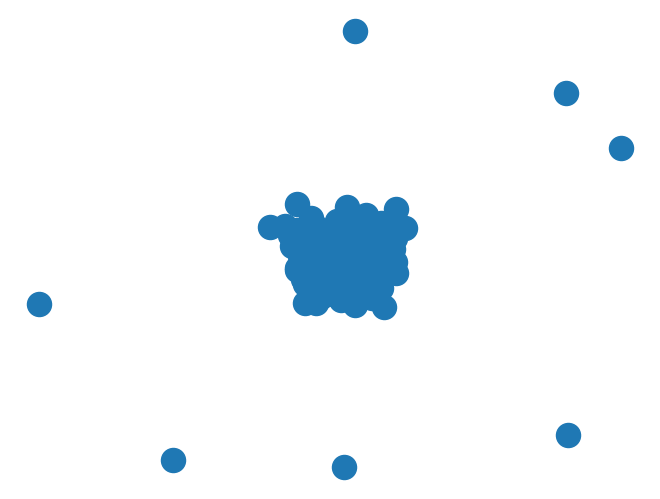

In [38]:
nx.draw(G)

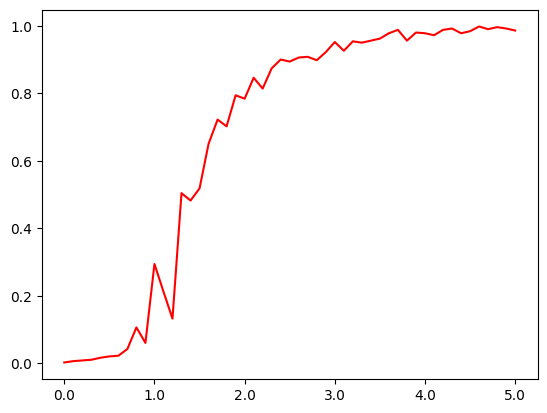

In [39]:
plt.xticks([x for x in range(0,51,10)], [x*1.0/10 for x in range(0,51,10)] )
plt.plot(z,'-r')
plt.show()

In [41]:
# Averaging 100 graphs
z = [0]*51
for _ in range(100):
    for i in range(0,51,1):
        N=500
        K = i*1.0/10
        P = K/N
        G = nx.erdos_renyi_graph(N,P)
        GC = sorted((G.subgraph(c) for c in nx.connected_components(G)), key=len, reverse=True)
        ng = len(GC[0])
        z[i] += (ng*1.0/N)

In [42]:
import networkx as nx
from collections import defaultdict
import networkx as nx
import random
import pandas as pd
import numpy as np
import os
import csv
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from networkx.algorithms.community import *
import collections
import operator
import itertools
from operator import itemgetter
from networkx.algorithms import community

[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9]]


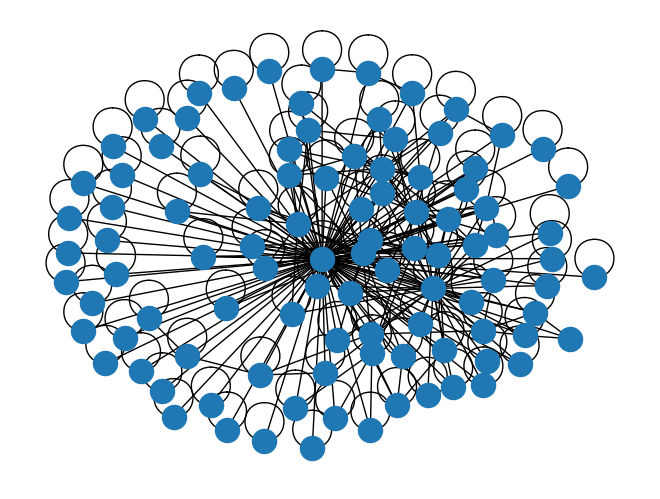

In [43]:
l=[]
with open('Slashdot0902.txt') as f:
    for line in f:
        il=line.split("\t")
        il[-1]=il[-1][:-1]
        il=list(map(int,il))
        l.append(il)

print(l[:10])

refined_l = []
for i in l:
    if i[0] < 100 and i[1] < 100:
        refined_l.append(i)

nodes = []
for i in refined_l:
    nodes.append(i[0])
    nodes.append(i[1])

nodes = sorted(set(nodes))

G = nx.Graph()
for i in nodes:
    G.add_node(i)

tuple_t = []
for i in refined_l:
    tuple_t.append((i[0],i[1]))

G.add_edges_from(tuple_t)

nx.draw(G)
plt.draw()

In [44]:
c = list(greedy_modularity_communities(G))
print("The number of communities is ", len(c))
print("The communities are:")
for i in c:
    print(list(i))

The number of communities is  7
The communities are:
[0, 6, 7, 10, 12, 13, 16, 19, 20, 22, 23, 24, 31, 32, 33, 40, 42, 44, 46, 47, 48, 56, 57, 59, 65, 67, 68, 70, 71, 72, 76, 77, 80, 83, 85, 90, 99]
[64, 2, 66, 75, 78, 17, 21, 88, 89, 26, 27, 29, 30, 34, 36, 39, 41, 55, 58]
[3, 8, 9, 11, 79, 18, 86, 25, 28, 93, 96, 97, 49, 50, 52, 53, 54, 63]
[35, 37, 38, 73, 74, 43, 45, 14, 81, 82, 87, 91]
[1, 98, 4, 92, 61, 94, 95]
[84, 5, 69, 60, 15]
[51, 62]


In [45]:
from collections import defaultdict
import networkx as nx

# First step
# Computation of k-clique percolation algorithm
# with k = 2
def k_clique_communities(G, cliques=None):
    if cliques is None:
        cliques = nx.find_cliques(G)
    cliques = [frozenset(c) for c in cliques if len(c) >= 2]

    # First index which nodes are in which cliques
    membership_dict = defaultdict(list)
    for clique in cliques:
        for node in clique:
            membership_dict[node].append(clique)

    # For each clique, see which adjacent cliques percolate
    perc_graph = nx.Graph()
    perc_graph.add_nodes_from(cliques)
    for clique in cliques:
        for adj_clique in _get_adjacent_cliques(clique, membership_dict):
            if len(clique.intersection(adj_clique)) >= 2:
                perc_graph.add_edge(clique, adj_clique)

    # Connected components of clique graph with perc edges
    # are the percolated cliques
    for component in nx.connected_components(perc_graph):
        yield(frozenset.union(*component))

def _get_adjacent_cliques(clique, membership_dict):
    adjacent_cliques = set()
    for n in clique:
        for adj_clique in membership_dict[n]:
            if clique != adj_clique:
                adjacent_cliques.add(adj_clique)
    return adjacent_cliques

H = nx.Graph(G)
c = list(k_clique_communities(H))
print(c)
print(len(c))

[frozenset({0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 14, 15, 17, 18, 19, 21, 22, 25, 26, 27, 28, 29, 30, 34, 35, 36, 37, 38, 39, 41, 43, 45, 49, 50, 51, 52, 53, 54, 55, 58, 60, 61, 62, 63, 64, 66, 68, 69, 71, 73, 74, 75, 77, 78, 79, 81, 82, 83, 84, 86, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 98}), frozenset({0, 6}), frozenset({0, 7}), frozenset({0, 12}), frozenset({0, 13}), frozenset({0, 16}), frozenset({0, 20}), frozenset({0, 23}), frozenset({0, 24}), frozenset({0, 31}), frozenset({0, 32}), frozenset({0, 33}), frozenset({0, 40}), frozenset({0, 42}), frozenset({0, 44}), frozenset({0, 46}), frozenset({0, 47}), frozenset({0, 48}), frozenset({0, 56}), frozenset({0, 57}), frozenset({0, 59}), frozenset({0, 65}), frozenset({0, 67}), frozenset({0, 70}), frozenset({0, 72}), frozenset({0, 76}), frozenset({0, 80}), frozenset({0, 85}), frozenset({0, 90}), frozenset({0, 99})]
30


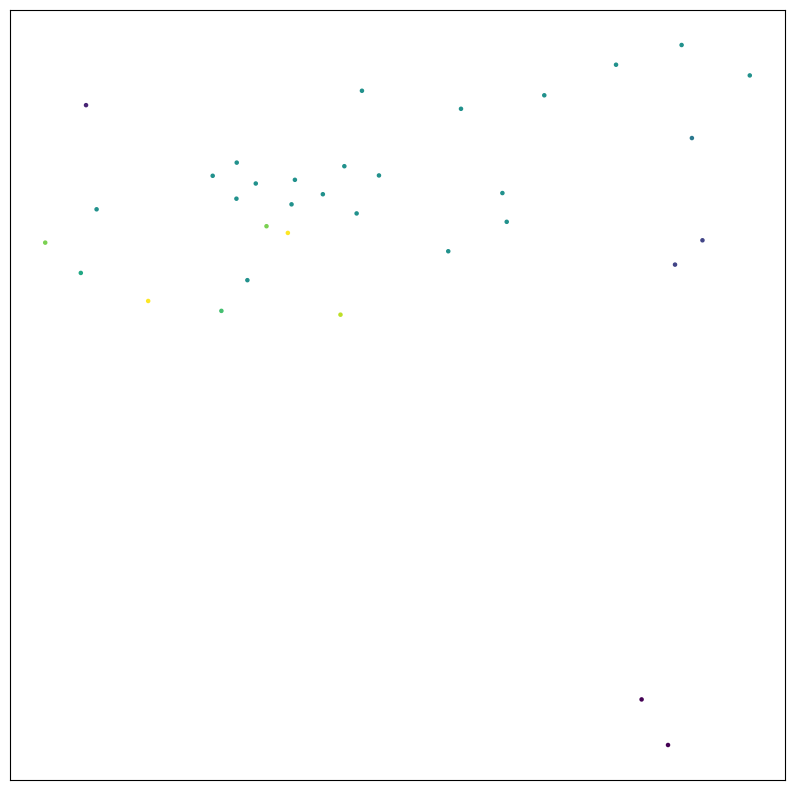

In [61]:
mapper = {}
for i, comm in enumerate(c):
    mapper.update(dict.fromkeys(list(comm), i))

mapped = collections.OrderedDict(sorted(mapper.items()))
len(mapper)

color_map = []
for node in G.nodes:
    color_map.append(mapper[node])

pos = nx.spring_layout(G)
plt.figure(figsize=(10,10))
plt.axis('on')
nx.draw_networkx_nodes(G, pos, node_color = color_map, node_size = 5)
plt.show()

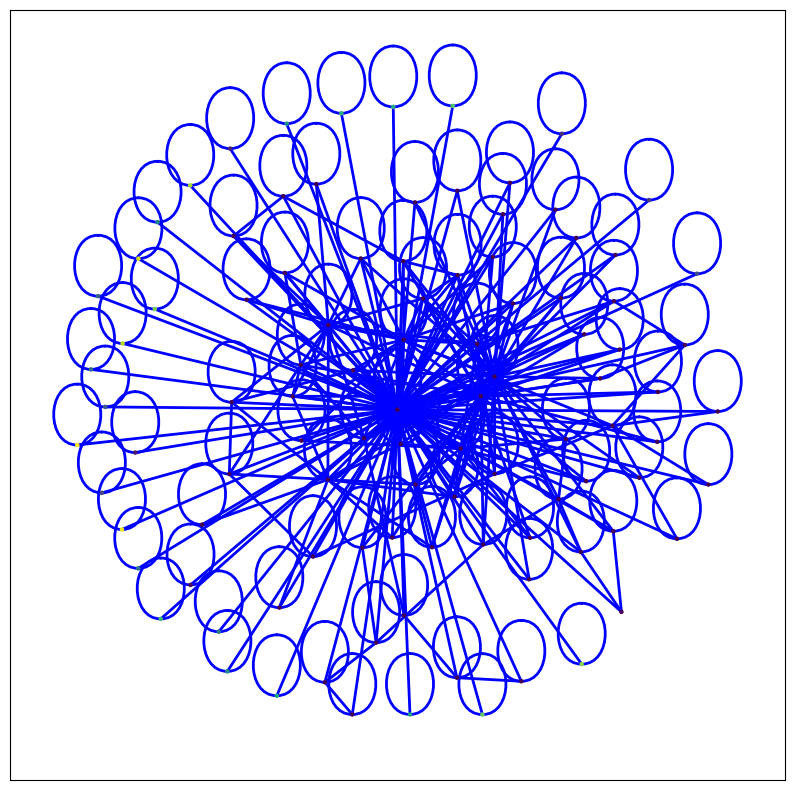

In [47]:
from networkx.algorithms import community

comp = community.label_propagation.asyn_lpa_communities(G)

# for c in next(comp):
mapper = {}
cnt = 0
for i in tuple(comp):
    cnt = cnt+1
    for j in i:
        mapper[j]=cnt

"""for i in sorted(mapper.keys()):
    print(i, mapper[i])"""
len(mapper)

color_map = []
for node in G.nodes:
    if node in mapper:
        color_map.append(mapper[node])
    else:
        color_map.append('black')

pos = nx.spring_layout(G)
plt.figure(figsize=(10,10))
plt.axis('on')
nx.draw_networkx(G, pos, node_color = color_map, with_labels = False, width=2, edge_color='b', node_size = 5)
plt.show()

In [48]:
comp = girvan_newman(G)
tuple(sorted(c) for c in next(comp))

([0,
  1,
  2,
  3,
  4,
  5,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99],
 [6])

In [49]:
import networkx as nx
from collections import defaultdict
import networkx as nx
import random
import pandas as pd
import numpy as np
import os
import csv
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from networkx.algorithms.community import *
import collections
import operator
import itertools
from operator import itemgetter
from networkx.algorithms import community

[[214328887, 34428380], [17116707, 28465635], [380580781, 18996905], [221036078, 153460275], [107830991, 17868918], [151338729, 222261763], [19705747, 34428380], [222261763, 88323281], [19933035, 149538028], [158419434, 17434613]]


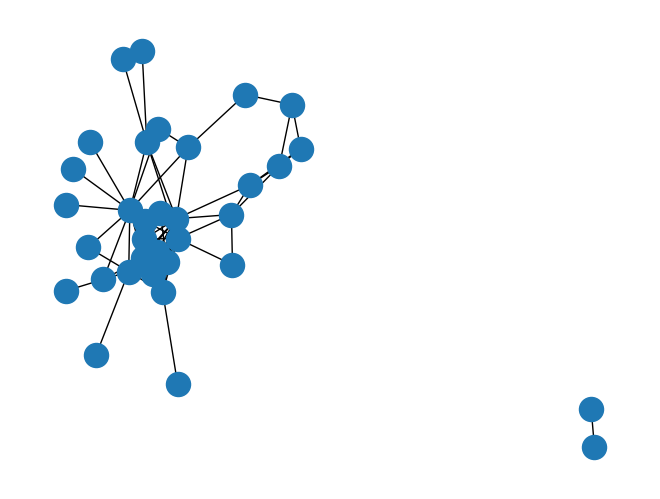

In [50]:
l=[]
with open('twitter_combined.txt') as f:
    for line in f:
        il=line.split(" ")
        il[-1]=il[-1][:-1]
        il=list(map(int,il))
        l.append(il)

print(l[:10])

refined_l = []
for i in l:
    if i[0] < 1000 and i[1] < 1000:
        refined_l.append(i)

nodes = []
for i in refined_l:
    nodes.append(i[0])
    nodes.append(i[1])

nodes = sorted(set(nodes))

G = nx.Graph()
for i in nodes:
    G.add_node(i)

tuple_t = []
for i in refined_l:
    tuple_t.append((i[0],i[1]))

G.add_edges_from(tuple_t)

nx.draw(G)
plt.draw()

In [51]:
c = list(greedy_modularity_communities(G))
print("The number of communities is ", len(c))
print("The communities are:")
for i in c:
    print(list(i))

The number of communities is  6
The communities are:
[291, 324, 422, 295, 648, 586, 107, 13, 785, 885, 989]
[939, 12, 14, 47, 528, 761, 409, 380]
[66, 20, 949, 997, 746, 414]
[418, 573, 246, 922]
[760, 765, 767]
[224, 929]


In [52]:
from collections import defaultdict
import networkx as nx

# First step
# Computation of k-clique percolation algorithm
# with k = 2
def k_clique_communities(G, cliques=None):
    if cliques is None:
        cliques = nx.find_cliques(G)
    cliques = [frozenset(c) for c in cliques if len(c) >= 2]

    # First index which nodes are in which cliques
    membership_dict = defaultdict(list)
    for clique in cliques:
        for node in clique:
            membership_dict[node].append(clique)

    # For each clique, see which adjacent cliques percolate
    perc_graph = nx.Graph()
    perc_graph.add_nodes_from(cliques)
    for clique in cliques:
        for adj_clique in _get_adjacent_cliques(clique, membership_dict):
            if len(clique.intersection(adj_clique)) >= 2:
                perc_graph.add_edge(clique, adj_clique)

    # Connected components of clique graph with perc edges
    # are the percolated cliques
    for component in nx.connected_components(perc_graph):
        yield(frozenset.union(*component))

def _get_adjacent_cliques(clique, membership_dict):
    adjacent_cliques = set()
    for n in clique:
        for adj_clique in membership_dict[n]:
            if clique != adj_clique:
                adjacent_cliques.add(adj_clique)
    return adjacent_cliques

H = nx.Graph(G)
c = list(k_clique_communities(H))
print(c)
print(len(c))

[frozenset({224, 929}), frozenset({324, 295}), frozenset({760, 765, 767}), frozenset({528, 939}), frozenset({939, 414}), frozenset({648, 586, 12, 13, 14, 528, 785, 20, 409, 989, 414, 418, 291, 422, 295, 746, 107, 47, 885, 246, 761, 380, 767}), frozenset({66, 20}), frozenset({20, 997}), frozenset({20, 949}), frozenset({418, 922}), frozenset({418, 573})]
11


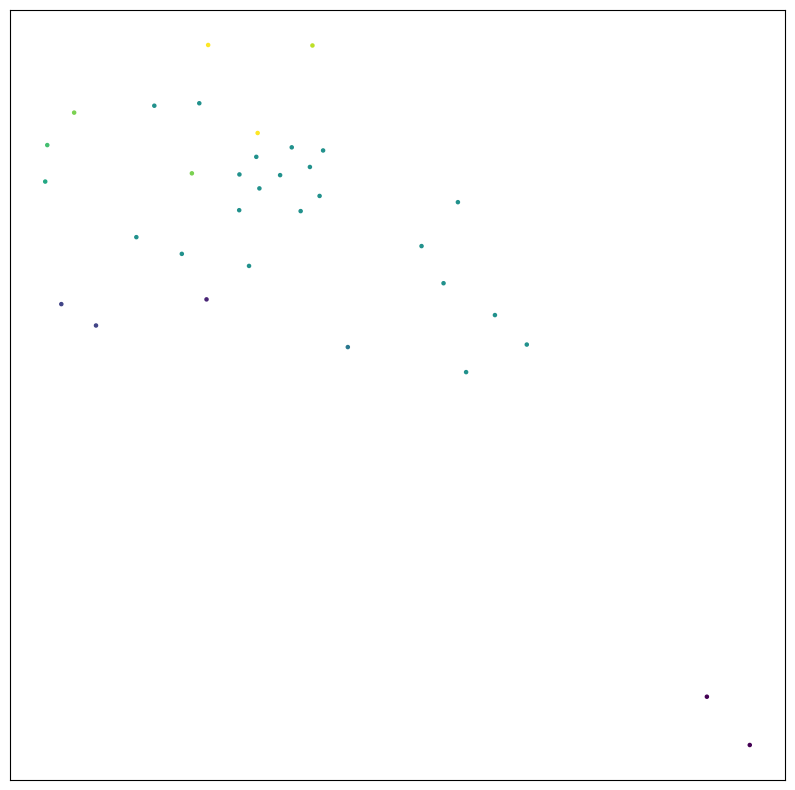

In [60]:
mapper = {}
for i, comm in enumerate(c):
    mapper.update(dict.fromkeys(list(comm), i))

mapped = collections.OrderedDict(sorted(mapper.items()))
len(mapper)

color_map = []
for node in G.nodes:
    color_map.append(mapper[node])

pos = nx.spring_layout(G)
plt.figure(figsize=(10,10))
plt.axis('on')
nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=5)
plt.show()

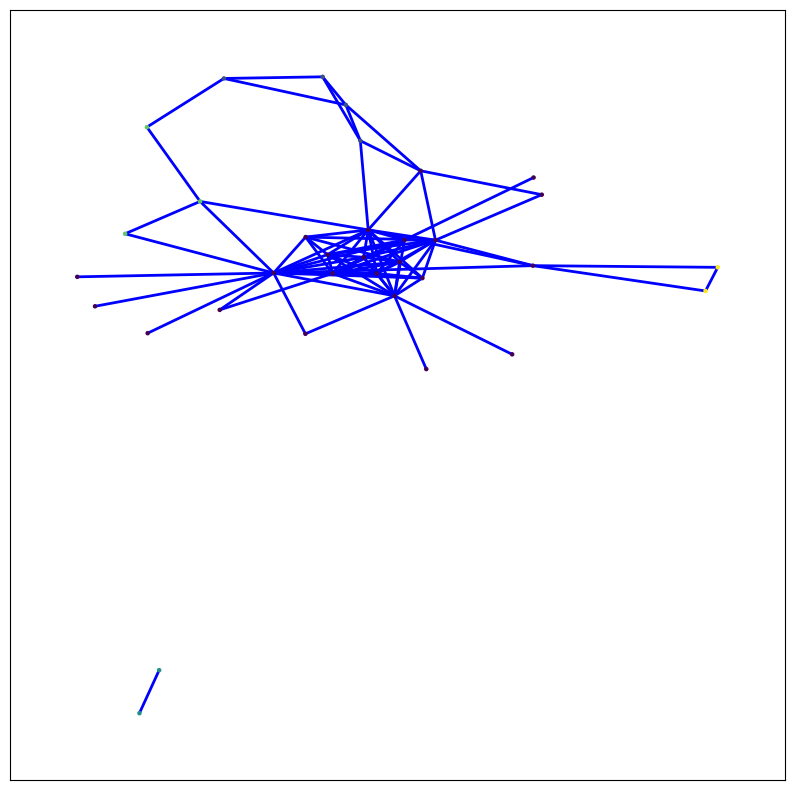

In [59]:
from networkx.algorithms import community

comp = community.label_propagation.asyn_lpa_communities(G)

# for c in next(comp):
mapper = {}
cnt = 0
for i in tuple(comp):
    cnt = cnt+1
    for j in i:
        mapper[j]=cnt

"""for i in sorted(mapper.keys()):
    print(i, mapper[i])"""
len(mapper)

color_map = []
for node in G.nodes:
    if node in mapper:
        color_map.append(mapper[node])
    else:
        color_map.append('black')

pos = nx.spring_layout(G)
plt.figure(figsize=(10,10))
plt.axis('on')
nx.draw_networkx(G, pos, node_color = color_map, with_labels = False, width=2, edge_color='b', node_size = 5)
plt.show()

In [54]:
comp = girvan_newman(G)
tuple(sorted(c) for c in next(comp))

([12,
  13,
  20,
  66,
  107,
  246,
  291,
  295,
  324,
  414,
  418,
  422,
  573,
  586,
  648,
  746,
  760,
  765,
  767,
  785,
  885,
  922,
  949,
  989,
  997],
 [14, 47, 380, 409, 528, 761, 939],
 [224, 929])

In [63]:
import networkx as nx
import numpy as np

def calculate_polarization_index(G):
    node_scores = {}

    for u, v, data in G.edges(data=True):
        sign = data.get('sign', 1)
        for node in [u, v]:
            if node not in node_scores:
                node_scores[node] = {'friends': 0, 'foes': 0}
            if sign == 1:
                node_scores[node]['friends'] += 1
            elif sign == -1:
                node_scores[node]['foes'] += 1

    polarization_scores = []
    for node, counts in node_scores.items():
        total = counts['friends'] + counts['foes']
        if total > 0:
            score = abs((counts['foes'] / total) - 0.5) * 2  # normalize
            polarization_scores.append(score)

    return np.mean(polarization_scores)

polarization_index = calculate_polarization_index(G)
print(f"📊 Polarization Index of the network: {polarization_index:.4f}")


📊 Polarization Index of the network: 1.0000
